In [10]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the model class
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)  # 1 input channel, 6 output channels, kernel size 3
        self.conv2 = nn.Conv2d(6, 16, 3, 1) # 16 output channels
        self.fc1 = nn.Linear(5*5*16, 120)   # Fully connected layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 5*5*16)  # Flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Now you can load the model
model = torch.load('mnist_cnn.pth')
model.cpu()
model.eval()  # Set model to evaluation mode


C:\Users\91914\AppData\Local\Temp\ipykernel_2104\2756631838.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('mnist_cnn.pth')


ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [13]:
# device = ('cuda' if torch.cuda.is_available() else 'cpu')
# device

'cuda'

In [17]:
transform = transforms.ToTensor()
test_data = datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transform)

In [27]:
test = test_data[1547]
test

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [28]:
test_1 = test[0]

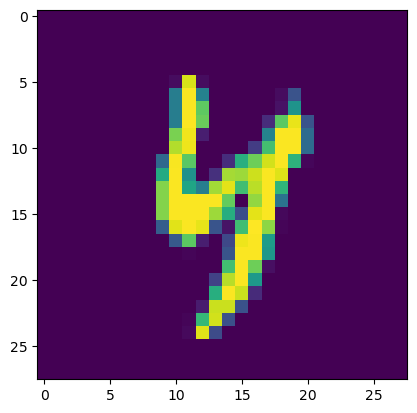

In [29]:
plt.imshow(test_1.reshape(28,28))

In [30]:
model.eval()
with torch.no_grad():
    new_pred = model(test_1.view(1,1,28,28)) #batch size of 1, 1 color channel (grayscale), then height and width

In [31]:
new_pred

tensor([[-2.1327e+01, -1.8939e+01, -1.6235e+01, -1.8894e+01, -3.6579e-04,
         -1.7776e+01, -2.0476e+01, -1.0984e+01, -1.1332e+01, -7.9962e+00]])

In [32]:
new_pred.argmax()

tensor(4)

In [24]:
new_pred.data

tensor([[-1.7226e+01, -2.0133e+01, -1.2049e-02, -1.2528e+01, -2.2855e+01,
         -2.5500e+01, -2.0503e+01, -1.8433e+01, -4.4251e+00, -2.3194e+01]])

predicted = torch.max(y_pred.data, 1)[1]

In [33]:
torch.max(new_pred.data, 1)[1]


tensor([4])